In [81]:
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder
shap.initjs()


In [83]:
label_encoder = joblib.load("../models/dev/rf/label_encoder.pkl")  # Replace with your actual file path


In [32]:

# Load your data and model here
# X: your feature data
# model: your trained scikit-learn model
data_path = "../data/processed/features/final_features.csv"

# Load the trained RandomForestClassifier model
model_path = "../models/prod/rf/rf_prod_model.pkl"
model = joblib.load(model_path)

# Load your feature data
data_path = "../data/processed/features/final_features.csv"
data = pd.read_csv(data_path)
X = data.drop(columns=['label', 'video_frame', 'filename'])


In [47]:

# Initialize the SHAP explainer
explainer = shap.Explainer(model)

# Compute SHAP values for a single instance
sample_idx = 0  # Index of the instance you want to explain
shap_values = explainer.shap_values(X)

# Print the SHAP values
# print("SHAP values:", shap_values)

# Plot the explanation
#shap.plots.waterfall(shap_values[0])


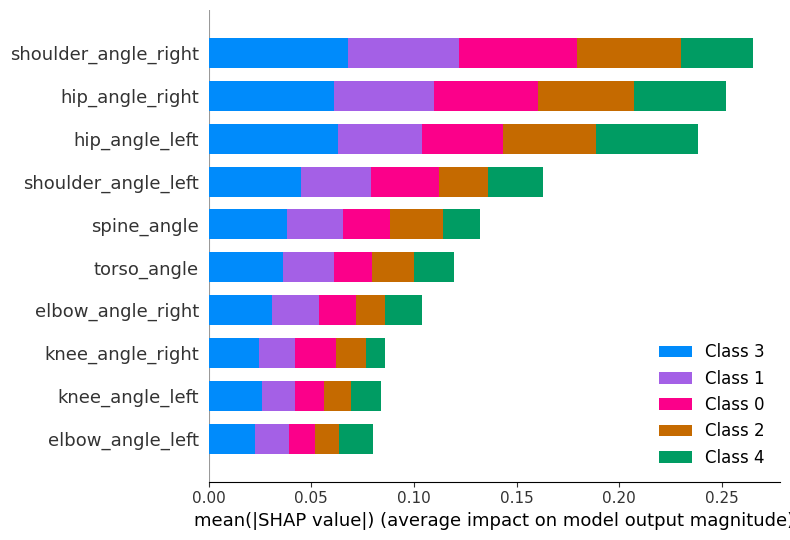

In [48]:
shap.summary_plot(shap_values, X)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


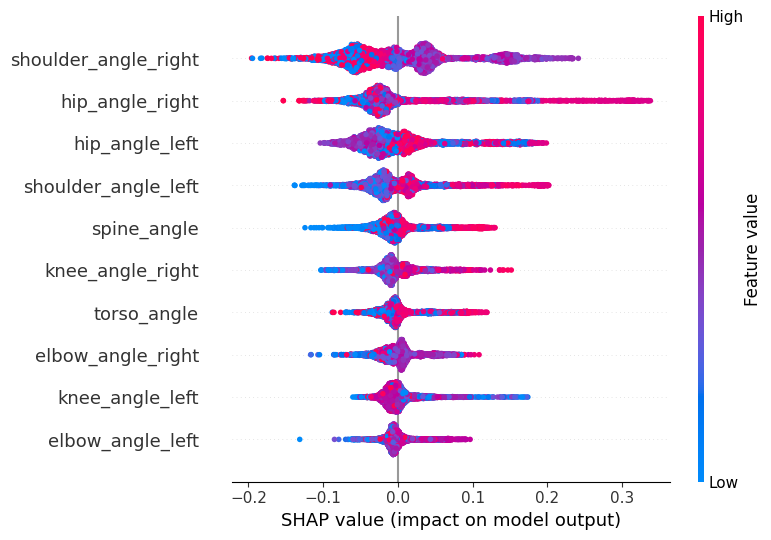

In [49]:
shap.summary_plot(shap_values[0], X)

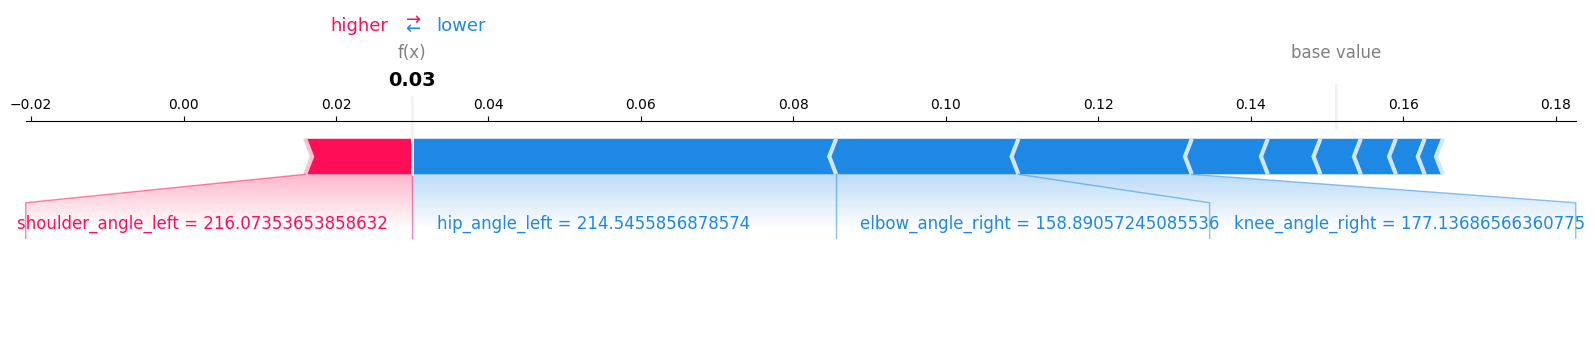

In [50]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X.iloc[0, :], matplotlib = True)

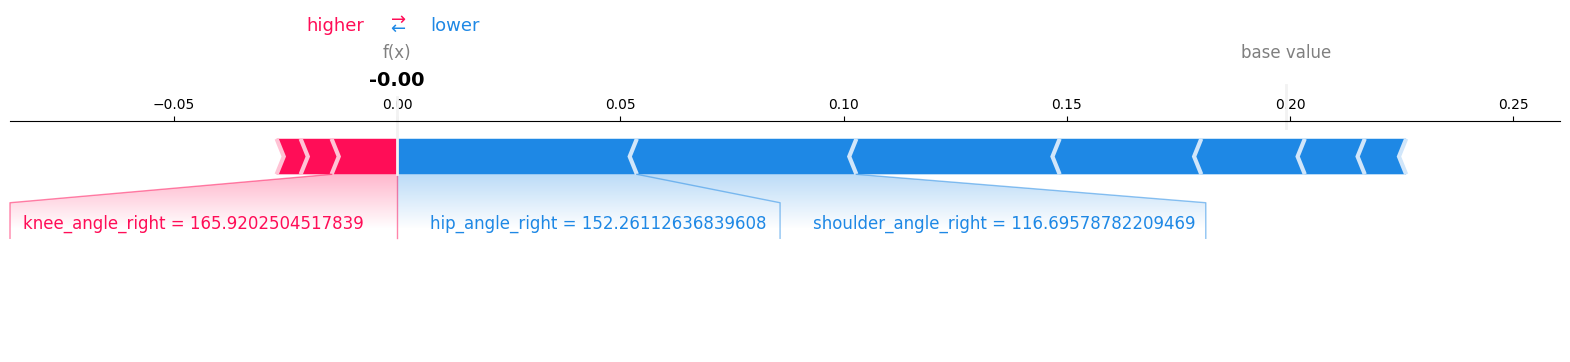

In [51]:
shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X.iloc[6, :],matplotlib = True)

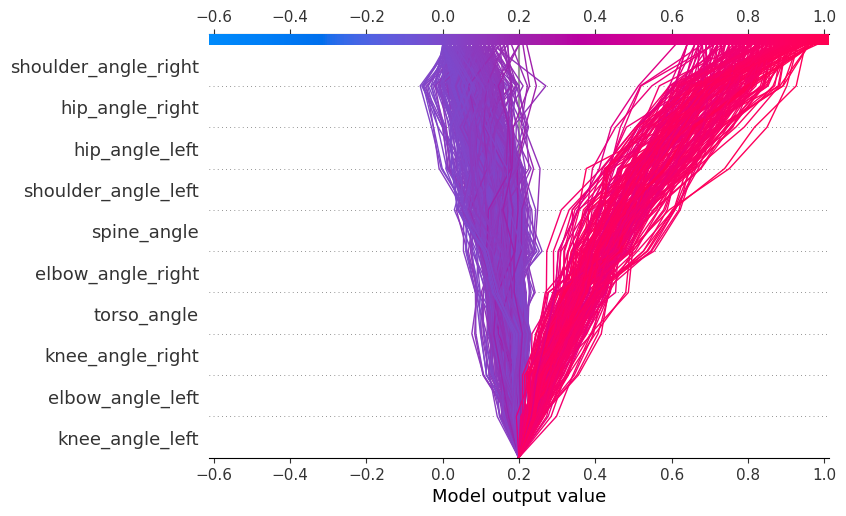

In [61]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][1000:2000], X.columns)

In [63]:
shap.waterfall_plot(shap.Explanation(shap_values[0], feature_names=X.columns))


ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (5020, 10)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [69]:
# Compute SHAP values for the chosen instance
sample_idx = 155
single_instance_shap_values = explainer(X.loc[sample_idx])

In [85]:
class_names

array(['l-hang', 'meathook', 'nutcracker', 'other pose or transition',
       'reverse meathook'], dtype=object)

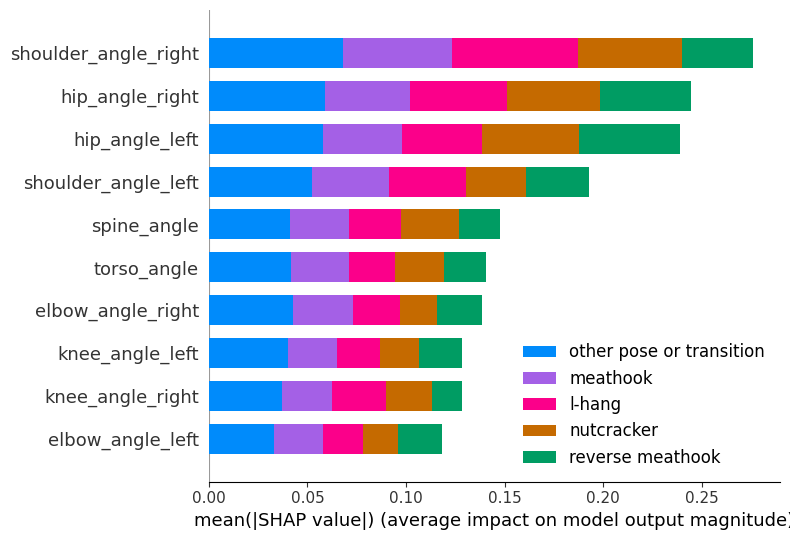

In [86]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X,approximate=True)
# Retrieve the class labels from the label encoder
class_names = label_encoder.inverse_transform(range(len(model.classes_)))

# Create a summary plot for the selected instance with class labels
shap.summary_plot(shap_values, X, plot_type="bar", class_names=class_names)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


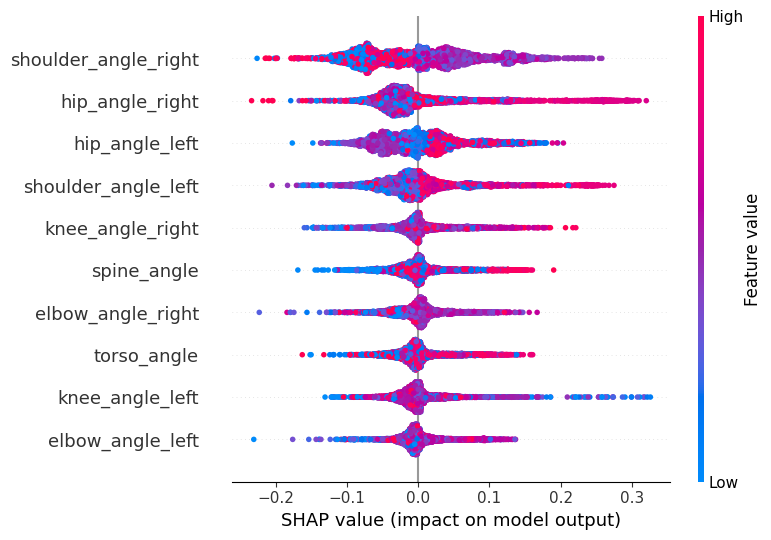

In [87]:
shap.summary_plot(shap_values[0], X) # for class 0

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


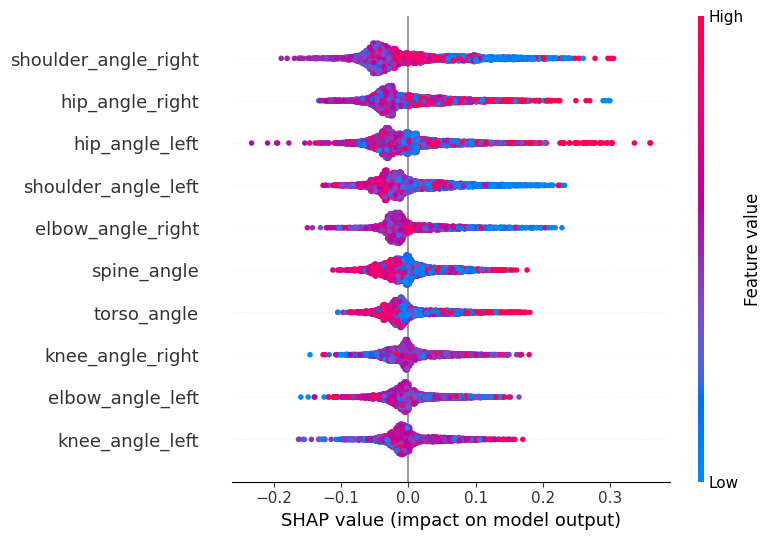

In [77]:
shap.summary_plot(shap_values[1], X) # for class 1

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


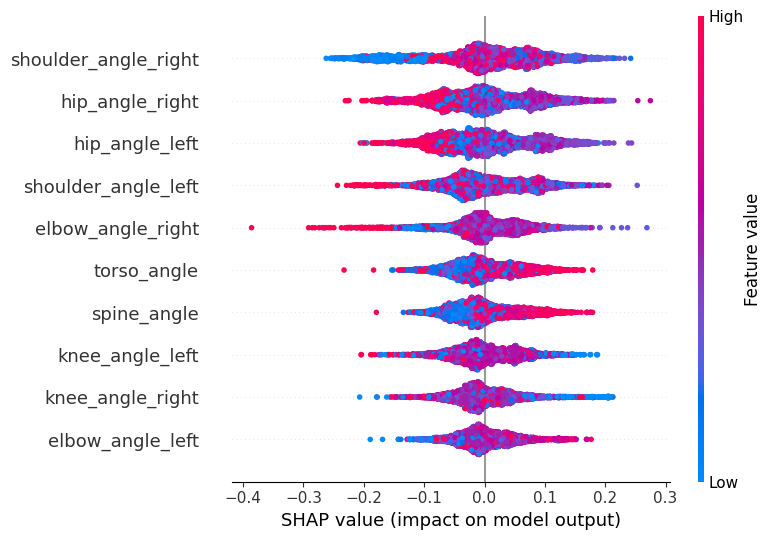

In [79]:
shap.summary_plot(shap_values[3], X) # for class 3

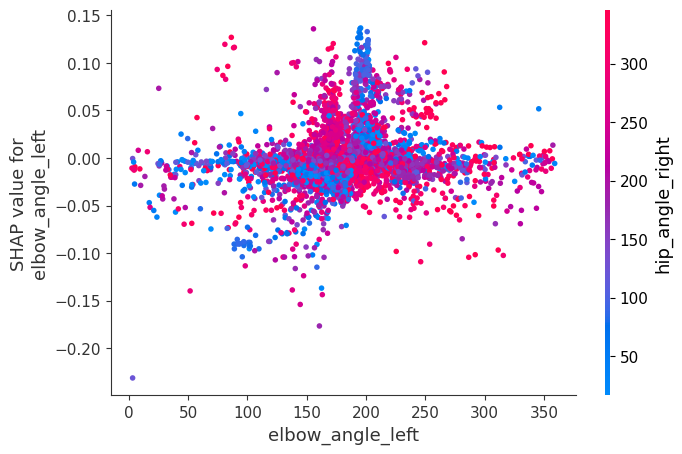

In [90]:
shap.dependence_plot(0, shap_values[0], X.values, feature_names=X.columns)

In [94]:
i=8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X.values[i], feature_names = X.columns)

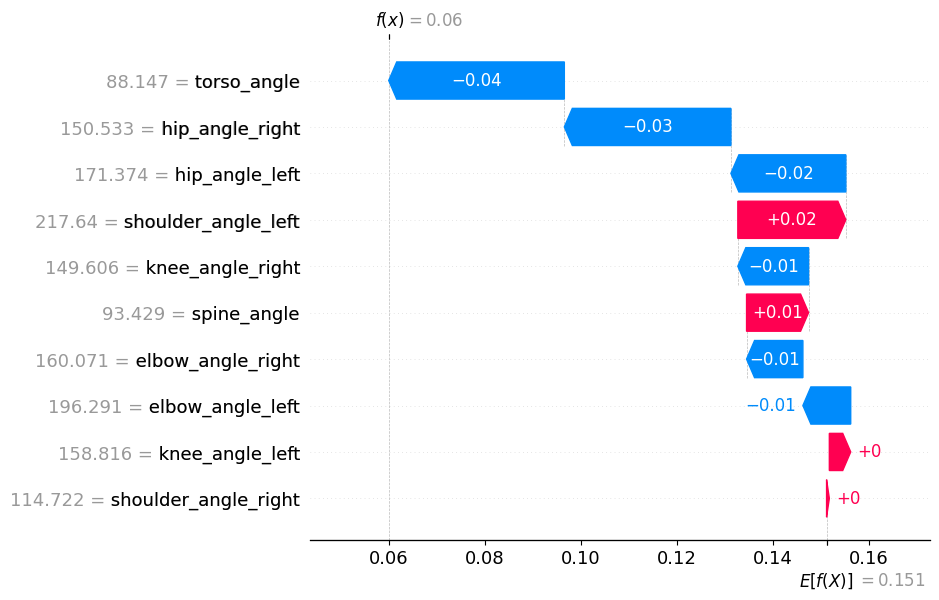

In [96]:
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X.iloc[row],  
                                         feature_names=X.columns.tolist()))